In [17]:
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## **Data**

In [18]:
key = [num for num in range(10)] + [chr(ord('A')+i) for i in range(7)]
value = [num for num in range(17)]

c2i = dict(zip(key, value))
i2c = {i:c for c,i in c2i.items()}

In [19]:
X, y = [], []

for label in key:
    path = f'data\\char{label}'
    for image in os.listdir(path):
        img_path = os.path.join(path, image)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        X.append(img)
        y.append(c2i[label])

In [20]:
X = np.array(X).reshape(-1, 64, 64, 1).astype('float32') / 255.0
y = np.array(y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state=2004)

len(X_train), len(X_test)

(2930, 1256)

Text(0.5, 1.0, 'Number of data points per label in training data')

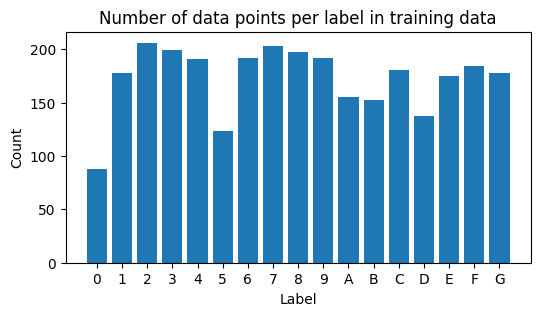

In [22]:
labels, count = np.unique(y_train, return_counts = True)

plt.figure(figsize = (6, 3))
plt.bar(labels, count, tick_label = key)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of data points per label in training data')

Text(0.5, 1.0, 'Number of data points per label in testing data')

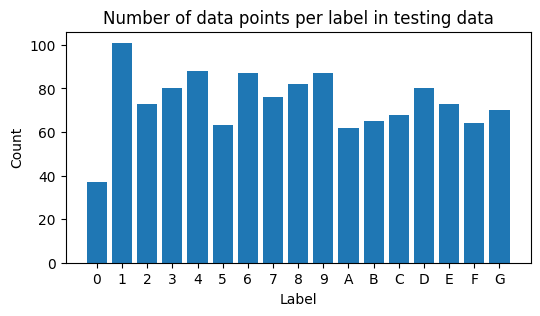

In [23]:
labels, count = np.unique(y_test, return_counts = True)

plt.figure(figsize = (6, 3))
plt.bar(labels, count, tick_label = key)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of data points per label in testing data')

## **Model**

In [24]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(17, activation=tf.nn.softmax))

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
92/92 [==============================] - 1s 5ms/step - loss: 0.4747 - accuracy: 0.8911
Epoch 2/5
92/92 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 3/5
92/92 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 4/5
92/92 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 5/5
92/92 [==============================] - 0s 4ms/step - loss: 8.8165e-04 - accuracy: 1.0000


In [27]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis = 1)
accuracy_score(y_test, pred)

40/40 [==============================] - 0s 1ms/step


1.0

In [28]:
model.save('pre_trained_model.h5')

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
